<font size ="8"> <div align="center">**FoodHub Data Analysis**</div></font>
<font size ="5"> <div align="center">By **Jon Nyner Gavan**</div></font>

-----
# **Context of the Case Study (FoodHub)**
-----
<p align = "justify">
The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

<p align = "justify">
The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

<p align = "justify">
The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience.
<br>
<br>

-----
## **Data Description**
-----

The data contains the different data related to a food order. The detailed data dictionary is given below.

**Data Dictionary**

* **order_id:** Unique ID of the order
* **customer_id:** ID of the customer who ordered the food
* **restaurant_name:** Name of the restaurant
* **cuisine_type:** Cuisine ordered by the customer
* **cost:** Cost of the order
* **day_of_the_week:** Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* **rating:** Rating given by the customer out of 5
* **food_preparation_time:** Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* **delivery_time:** Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

---
## **Goals of the Study**
---
<p align = "justify">
Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### **Importing the Python Libraries needed for the Analysis**

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mounting google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# reading the data from google Drive

path = '/content/drive/MyDrive/Classroom/Data Science/MIT Summer School/2 Foundations of Data Science/4 Assessment Project/foodhub_order.csv'
df = pd.read_csv(path)



### **Taking a quick look at the Data**

**Looking at 10 random entries from the Data**

In [ ]:
# Taking 10 Random samples out of the Dataset
df.sample(n=10)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
287,1478440,231042,Momoya,Japanese,12.13,Weekend,5,22,21
231,1477615,136876,Rubirosa,Italian,14.07,Weekend,5,35,16
964,1476768,72757,Jack's Wife Freda,Mediterranean,8.49,Weekend,Not given,23,18
133,1477110,144997,RedFarm Hudson,Chinese,29.05,Weekend,4,22,28
620,1477719,367051,RedFarm Hudson,Chinese,15.04,Weekend,3,35,25
1397,1477232,275689,Nobu Next Door,Japanese,9.17,Weekend,Not given,24,15
406,1477237,59217,Jack's Wife Freda,Mediterranean,16.15,Weekend,4,26,22
273,1477712,373633,Yama 49,Japanese,12.61,Weekday,5,23,28
766,1478049,259341,TAO,Japanese,12.71,Weekend,3,22,17
1785,1477857,363202,S'MAC,American,25.27,Weekend,5,20,29


* The DataFrame has 9 columns as mentioned in the Data Dictionary.
* Data in each row corresponds to the order placed by a customer.

**Checking the Shape of the Data**

In [ ]:
# Checking the shape of the dataset
print('There are {} number of rows and {} number of columns in the dataset'.format(df.shape[0], df.shape[1]))

There are 1898 number of rows and 9 number of columns in the dataset


* The given data contains **1898 rows and 9 columns**, corresponding to **1898 different orders and their information**


**Checking the dataypes of the columns in the Dataset**

In [ ]:
# Using info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


> From the results above, there are **5 numerical columns** with **4** of them being **integers** and **4 categorical columns**, presumably containing **strings**

- Oder and Customer IDs: identification numbers stored as integers
- Restaurant name and Cuisine type: Names stored as strings
- day of the week: String classifying orders into those made during weekdays and/or weekends
- rating: customer feedback (with 5 being the maximum), stored as string
- food preparation and delivery times: time in minutes, stored as integer
- cost of the order: total amount of the order, stored as a float

**Checking for Missing Values**

In [ ]:
# checking for any missing values in the dataset
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


* As seen above, the **sum of missing values for all columns is 0**, indicating there are **no missing values that need treatment**.

* This makes sense **since the summary output previously reported non-null counts** equalling the total number of orders.

**Preliminary analysis of Numerical Columns of the Data**

In [ ]:
# Getting summary statistics of numerical data using the describe function
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


- As seen before, there are 5 numerical columns:
  - `order_id `
  - `customer_id`
  - `cost_of_the_order`
  - `food_preparation_time`
  - `delivery_time`
- Upon cheking the food_preparation_time row of the summary statistics, the **average amount of time to prepare food is around 27.4 mins**, with the m**inimum and maximum being 20 and 35 mins, respectivel**y

**Taking a closer look at the Ratings column**

In [ ]:
# Checking the number of counts each unique rating got
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


In [ ]:
# Checking the percentage of unrated orders
df['rating'].value_counts(normalize = 'True')       #use of normalize parameter to immediately check how much of the orders were unrated

,proportion
rating,
Not given,0.387777
5,0.309800
4,0.203372
3,0.099052


* From the results above, it is seen that **736 orders have not been rated** and is registered with `Not given` string
> This is also the reason why the Rating column is stored as class string
* The `Not given` rating actually accounts for 38% of the total


### **Univariate Analysis**

#### **Analysis for Non-numerical Data**

In [ ]:
# Defining a function that plots barplot with corresponding values

def bar_annot(data, col, size):
    total = len(data[col])
    plt.figure(figsize = size)

    # Convert the column to a categorical data type
    data[col] = data[col].astype('category')
    # Plotting the countplot
    ax = sns.countplot(x=col,
                       data=data,
                       palette='Paired',
                       hue = col,
                       order=data[col].value_counts().index
                       )
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    # Annotating the Percentages of each Category
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        count = p.get_height()                                      # Count of each class
        x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
        y = p.get_y() + p.get_height()                              # Height of the plot
        ax.annotate(count, (x, y), size = 10)                  # Annotate the percentage

    plt.show()

**Order ID**

In [ ]:
# Checking number of unique order IDs
df['order_id'].nunique()    # use of nunique() function

1898

* Since the order ID merely distinguishes individual orders from each other, **plotting order ID data will not yield meaningful conclusions**.

**Customer ID**

In [ ]:
# Checking the number of unique customer IDs
df['customer_id'].nunique()

1200


*  <p align = "justify">The number of unique customer IDs is 1200, which is less than the total number of unique order IDs
* <p align = "justify">This indicates that some customers have placed orders using the app more than once.

In [ ]:
# Looking at the top patrons of the App
df['customer_id'].value_counts().head()

,count
customer_id,
52832,13
47440,10
83287,9
250494,8
259341,7


- The **top patron (ID: 52832) has placed a total of 13 orders using the App**
- The large **difference between unique order IDs and unique customer IDs** could also indicate that a considerable number of patrons **have used the app more than once**

**Restaurant Name**

In [ ]:
# Checking the number of unique Restaurants catering to customers
df['restaurant_name'].nunique()

178

In [ ]:
# checking the number of orders made from each unique Restaurant
df['restaurant_name'].value_counts()

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
...,...
Rye House,1
Hiroko's Place,1
Frank Restaurant,1


- from the results above, a total of 178 restaurants have catered to customers
- The **top 3 most popular restaurants** have all managed to receive over 100 orders

In [ ]:
# Displaying the top restaurants that were able to receive more than 50 orders
df['restaurant_name'].value_counts().loc[df['restaurant_name'].value_counts() > 50]


,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
RedFarm Broadway,59
RedFarm Hudson,55


* From the summary above, it can be seen that the 5 most popular restaurants are:
  1.  `Shake Shack`
  2.  `The Meatball Shop`
  3.  `Blue Ribbon Sushi`
  4.  `Blue Ribbon Fried Chicken`
  5.  `Parm`

In [ ]:
# Getting the top 5 restaurants using the value_counts function
df['restaurant_name'].value_counts().head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

**Cuisine Type**

In [ ]:
# Check unique cuisine type
df['cuisine_type'].nunique()

14

In [ ]:
# Checking the value counts of each cuisine type
df['cuisine_type'].value_counts()

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64

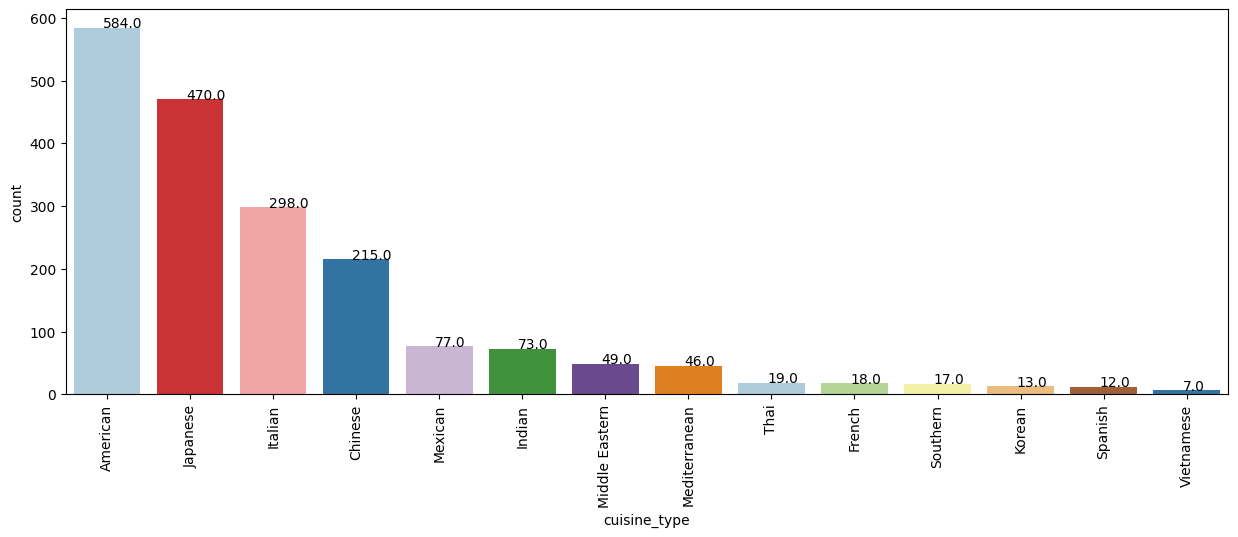

In [ ]:
# Applying Annotated Bar plot function on Cuisin Type
bar_annot(df, 'cuisine_type', (15,5))

- from the results above, it can be seen that the **top 4 cuisines** favored by customers are
  1. `American`
  2. `Japanese`
  3. `Italian`
  4. `Chinese`
- The abovementioned 4 cuisines are **siginificantly more popular** compared to the others as seen in the **large difference in order counts**

**Day of the Week**

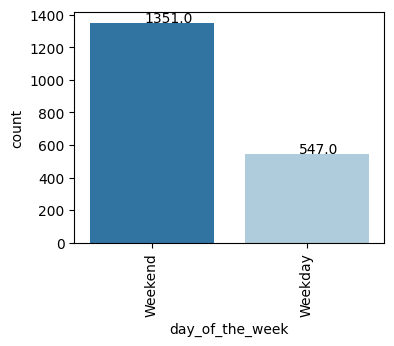

In [ ]:
# Plotting the barplot of orders segregated by day of the week
bar_annot(df, 'day_of_the_week', (4,3))

- It can be seen that there is a **significant difference between the anount of orders being placed by customers during weekends and weekdays**
- From the results above, there are **more** than twice the amounts of **orders being placed during the weekends** compared to weekdays

#### **Analysis for Numerical Data**

In [ ]:
# Defining a function that plots Histogram and Boxplot

def hist_box(feature, figsize=(8, 6), bins="auto"):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (8, 6))
    bins: number of bins (default "auto")
    """
    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # The X-axis will be shared among all the subplots
        gridspec_kw={"height_ratios": (.25, .75)},
        figsize=figsize
    )

    # Creating the subplots
    # Boxplot will be created and the mean value of the column will be indicated using some symbol
    sns.boxplot(x=feature, ax=ax_box, showmeans=True, color='red')

    # For histogram
    sns.histplot(x=feature, kde=False, ax=ax_hist, bins=bins)
    ax_hist.axvline(np.mean(feature), color='g', linestyle='--')      # Add mean to the histogram
    ax_hist.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

    plt.show()

**Cost of the Order**

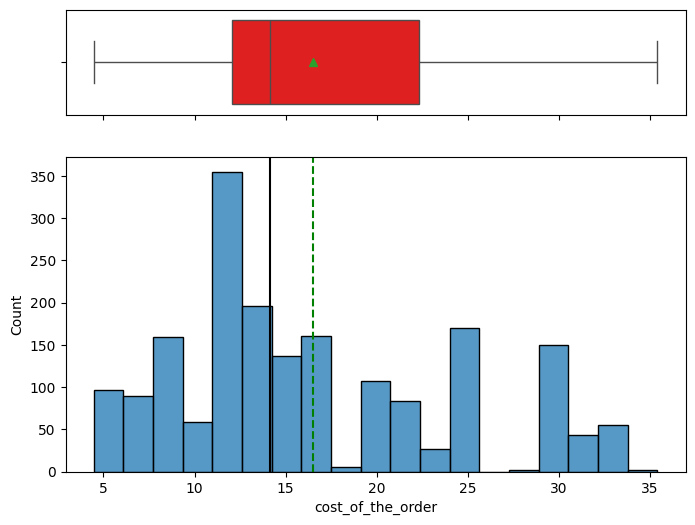

In [ ]:
# Applying hist_box function on Cost of order
hist_box(df['cost_of_the_order'])

- From the plots above, it can be seen that the **most occurring cost of orders is in the range 11-12.5 USD**
- Observing the Boxplot, **no outliers** can be found. Moreover the data is **right-skewed**, indicating that a **significant number of orders are relatively low-priced**

In [ ]:
# Extracting the orders that cost more than 20 dollars
more_than_20 = df.loc[df['cost_of_the_order'] > 20]       # using the loc function

# Calculate percentage of such orders in the dataset
percent = (more_than_20.shape[0] / df.shape[0]) * 100

print('The number of total orders that cost above 20 dollars is:', more_than_20.shape[0])
print("Percentage of orders above 20 dollars:", round(percent, 3), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.241 %


**Food Preparation Time**

In [ ]:
# Getting the range of food preparation time

min_time = df.food_preparation_time.min()
max_time = df.food_preparation_time.max()
print('The minimum time for preparing food is', min_time)
print('The maximum time for preparing food is', max_time)


The minimum time for preparing food is 20
The maximum time for preparing food is 35


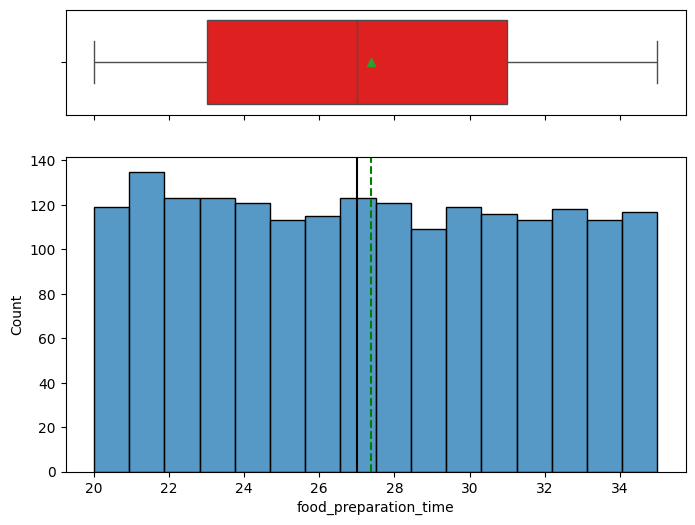

In [ ]:
# Applying hist_box function on Food preparation time
hist_box(df['food_preparation_time'], bins = 16)

- **Food preparation time ranges from 20-35 mins**
- from the bar graph, it can be seen that There are **roughly equal numbers of orders for each food preparation time value**

**Delivery Time**

In [ ]:
# Getting some preliminary information on delivery time

min_time1 = df.delivery_time.min()
max_time1 = df.delivery_time.max()
print('The minimum time for delivering food is', min_time1)
print('The maximum time for delivering food is', max_time1)

The minimum time for delivering food is 15
The maximum time for delivering food is 33


In [ ]:
# Getting the Average Order Delivery Time
mean_time1 = df.delivery_time.mean()
std_time1 = df.delivery_time.std()
print('The average time for delivering food is', mean_time1, 'With a standard deviation of ', std_time1)

The average time for delivering food is 24.161749209694417 With a standard deviation of  4.972636933991106


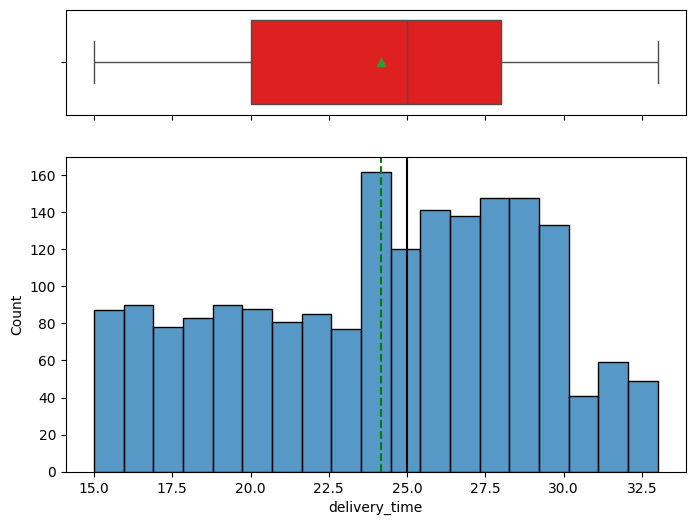

In [ ]:
# Applying hist_box function on Delivery time
hist_box(df['delivery_time'], bins = 19)

- **Food delivery time ranges from 15-33 mins**
- From the bar graph, it can be seen that **a large portion of the total orders are delivered in 24-30 mins**

**Rating**

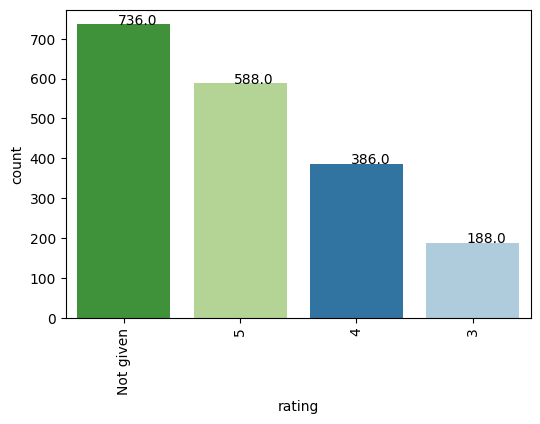

In [ ]:
# Applying Annotated Bar plot function on Rating
bar_annot(df, 'rating', (6,4))

- It can be seen that **unrated orders make up a significant portion of the total orders**
- **Rated orders have ratings ranging from 3 to 5**, with 5-rated orders being significantly larger in amount than 3-rated orders

### M**ultivariate Analysis**

Excluding Customer ID and Order ID, the current data we have consists of **categorical variables**:
- `restaurant_name`
- `cuisine_type`
- `day_of_the_week`
- `rating`

and **numerical variables**
- `cost_of_the_order`
- `food_preparation_time`
- `delivery_time`

We can **explore relations between** numerical and categorical variables as well as correlations between numerical **variables that may be of importance**

#### **Preparation time vs cuisine**

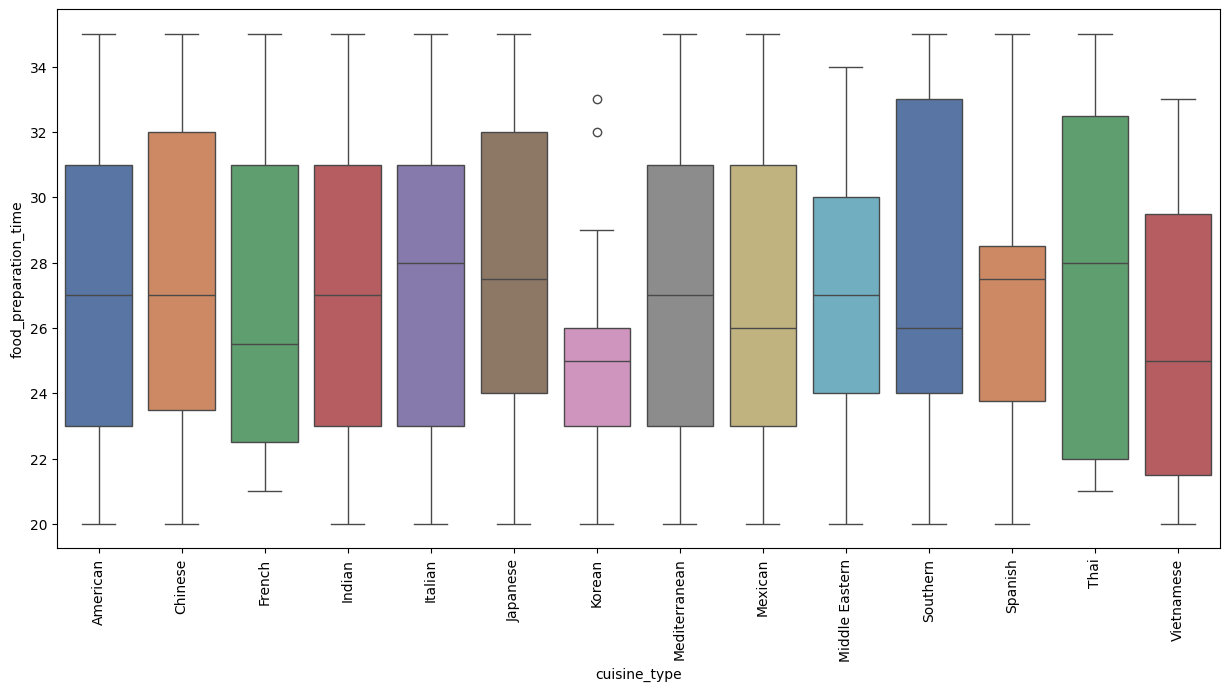

In [ ]:
# Plotting boxplots for preparation time of various cuisines

plt.figure(figsize=(15,7))
sns.boxplot(data = df, x = "cuisine_type", y = "food_preparation_time",
            palette = "deep", hue = "cuisine_type" )
plt.xticks(rotation = 90)
plt.show()

- among the cuisines, **Korean food takes the least amount of time** to prepare
- In terms of median values, **Japanese, Italian, Thai, and Spanish**, are somewhat higher than the rest

#### **Cuisine and Cost of Order**

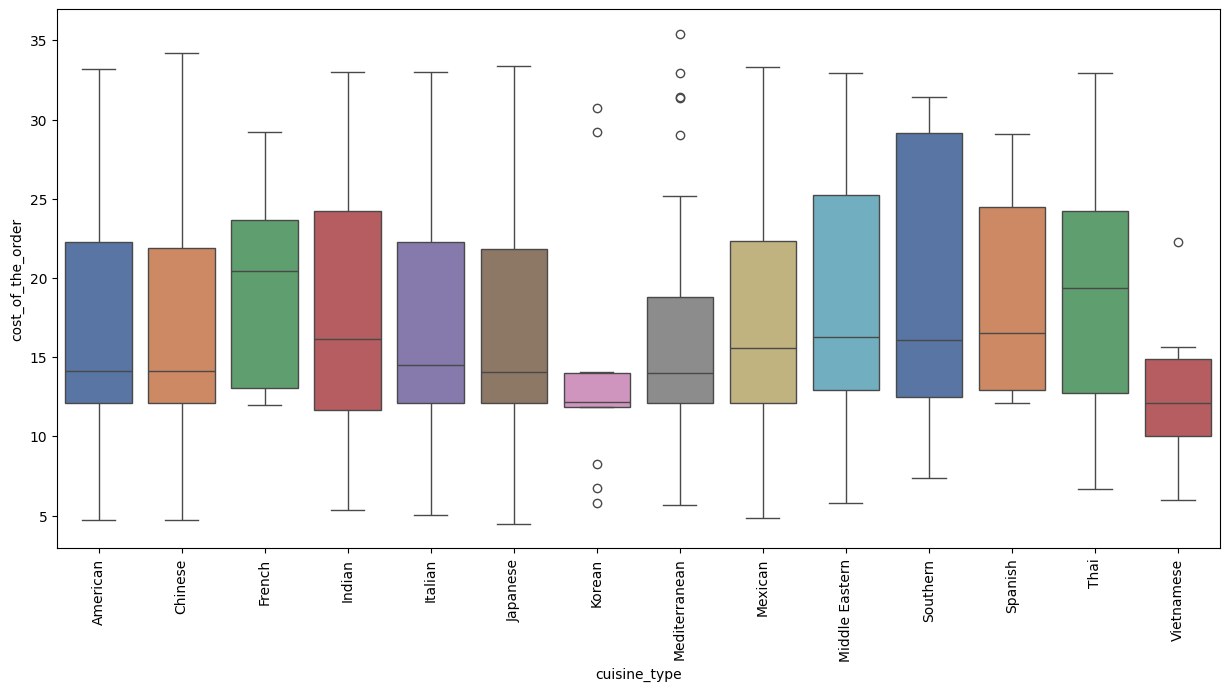

In [ ]:
# Plotting boxplots for order costs of various cuisines

plt.figure(figsize=(15,7))
sns.boxplot(data = df, x = "cuisine_type", y = "cost_of_the_order",
            palette = "deep", hue = "cuisine_type" )
plt.xticks(rotation = 90)
plt.show()

- **Korean, Mediterranean and Vietnamese cuisines** have **narrowest cost range** and are located at the relatively the **cheaper end of the price spectrum**
- Looking at the median costs, French and Thai cuisines have the highest costs
- **In terms of maximum cost of orders**, with the exception of the 3 cuisines above, m**ost cuisines are relatively the same**



#### **Cuisine and Day of the Week**

<Axes: xlabel='cuisine_type', ylabel='count'>

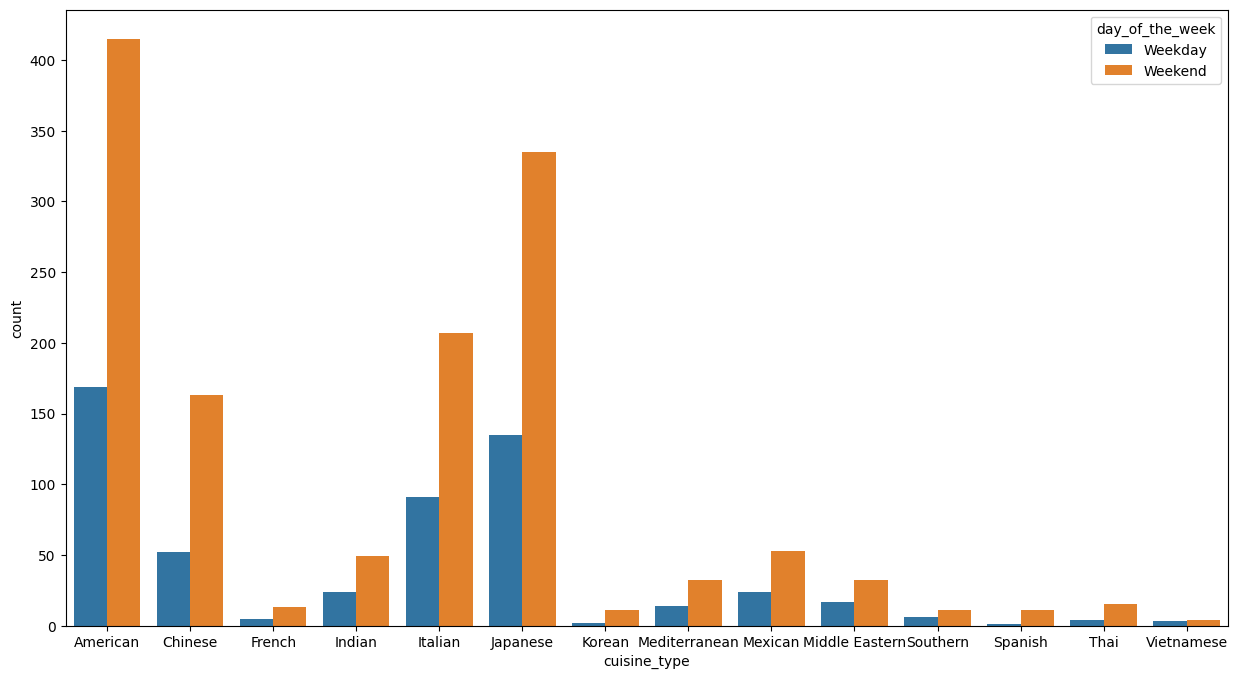

In [ ]:
# Generating the countplot for cuisine while differentiating orders made during weekend and weekdays

plt.figure(figsize = (15,8))
sns.countplot(data = df, x = 'cuisine_type', hue = 'day_of_the_week')

* From the graph above, it can be seen that **American cuisine is still the most popular during Weekends**
* This is followed by Japanese, Italian, and Chinese

#### **Delivery time vs Day of the Week**

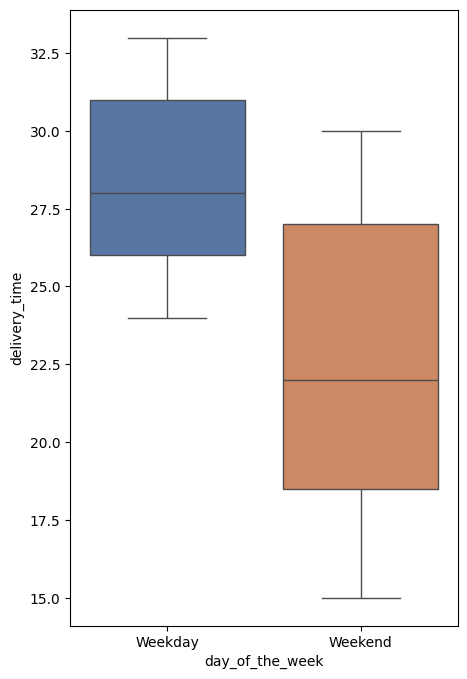

In [ ]:
# Plotting boxplots for order made during weekdays and weekend

plt.figure(figsize=(5,8))
sns.boxplot(data = df, y = "delivery_time", x = "day_of_the_week", palette = 'deep', hue = 'day_of_the_week')
plt.show()

- It can be seen that **delivery time during weekdays are generally longer compared** to that of weekends.

In [ ]:
# grouping data based on day of the week
week = df.groupby(['day_of_the_week'])

#getting mean delivery time for weekdays
weekday_mean = week.get_group('Weekday')['delivery_time'].mean()

#getting mean delivery time for weekend
weekend_mean = week.get_group('Weekend')['delivery_time'].mean()

print('The mean delivery time on weekdays is around', round(weekday_mean), 'mins')
print('The mean delivery time on weekends is around', round(weekend_mean), 'mins')

The mean delivery time on weekdays is around 28 mins
The mean delivery time on weekends is around 22 mins


 * From the results, it is seen that the average time for deliveries is around 6 mins longer during weekdays compared to weekends

#### **Rating and Restaurant**



**Looking for the top performing restaurants**
> Those with many and high ratings

In [ ]:
# Getting the part of the dataset that is rated
df_rated = df.loc[df['rating'] != 'Not given'].copy()

# rating data still stored as str, we need to convert them into int data type
df_rated['rating'] = df_rated['rating'].astype('int')

# Grouping data by restaurant name and getting the number of rated orders
df_rated_counted = df_rated.groupby(['restaurant_name'])['rating'].count().reset_index()

# Grouping data by restaurant name and getting the mean rating of the rated orders
df_rated_mean = df_rated.groupby(['restaurant_name'])['rating'].mean()

# Combining Data frames
df_rated_counted_with_mean = df_rated_counted.join(df_rated_mean, how ='inner', on = 'restaurant_name', lsuffix ='_count', rsuffix='_mean')

# Extracting parts of the data with rating counts > 50
fulfilling_criteria1 = df_rated_counted_with_mean.loc[df_rated_counted_with_mean['rating_count'] > 50]

# Extracting parts of the data (with rating counts > 50) that have mean ratings > 4
fulfilling_criteria2 = fulfilling_criteria1.loc[fulfilling_criteria1['rating_mean'] > 4]

# Sorting and dropping old index
fulfilling_criteria2.sort_values(by = 'rating_mean', ascending = False).reset_index(drop = True)

,restaurant_name,rating_count,rating_mean
0,The Meatball Shop,84,4.511905
1,Blue Ribbon Fried Chicken,64,4.328125
2,Shake Shack,133,4.278195
3,Blue Ribbon Sushi,73,4.219178


- From the data above, the top performing restaurants are:
  1. **The meatball shop** with **84 rating counts** and an **average of 4.512** rating
  2. **Blue Ribbon Fried Chicken** with **64 rating counts** and an **average of 4.328 rating**
  3. **The Shake Shack** with **133 rating counts** and an **average of 4.278 rating**
  4. **Blue Ribbon Sushi** with **73 rating counts** and an **average of 4.219 rating**

#### **Rating and cuisine**


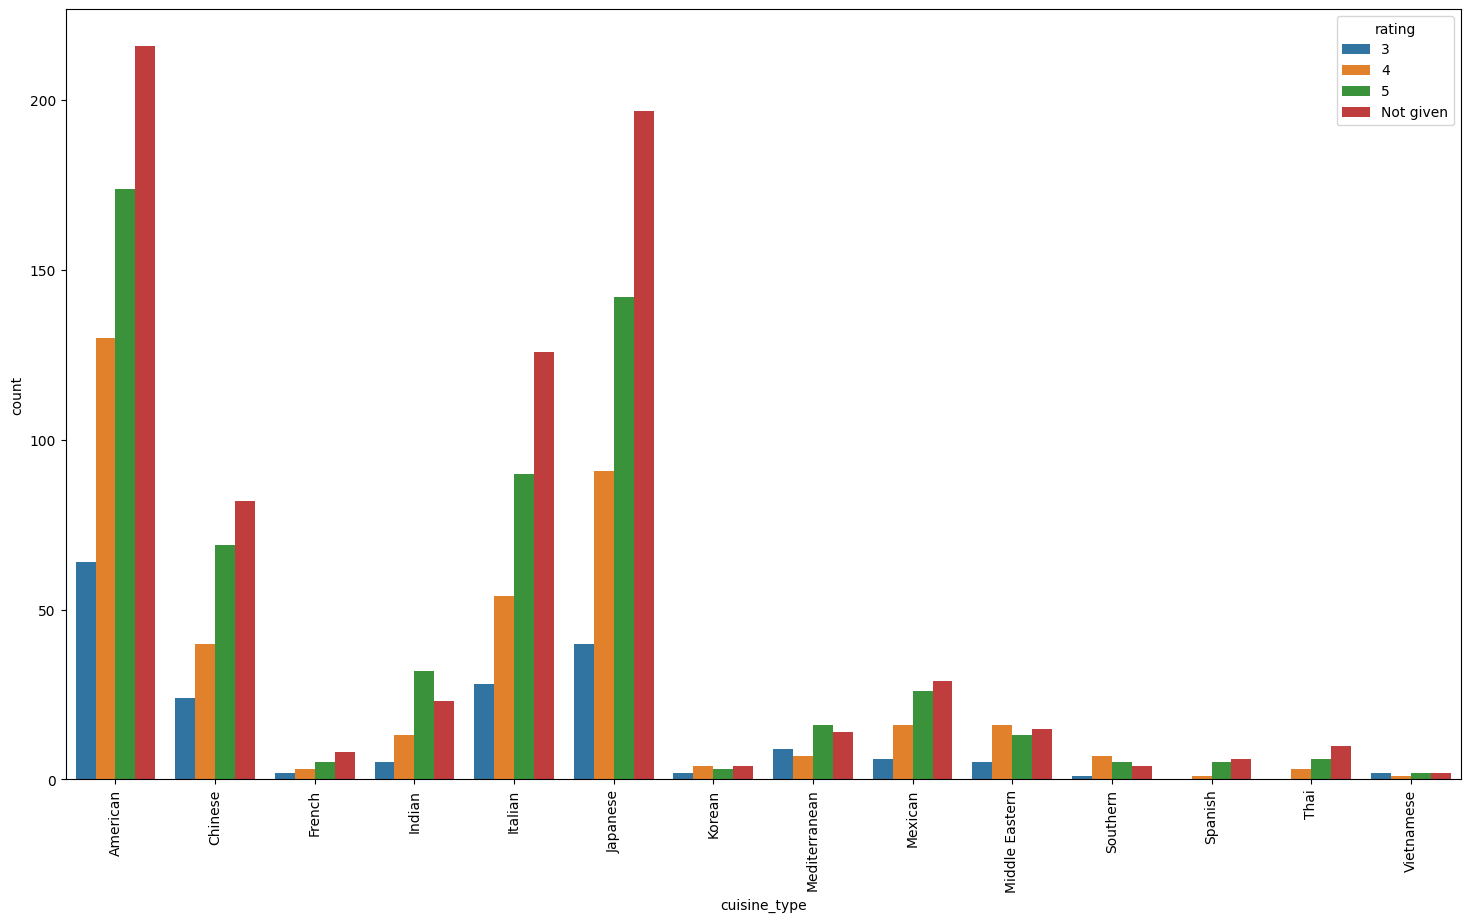

In [ ]:
# Plotting the ratings given to orders, segregated according to Cuisine Type

plt.figure(figsize=(18,10))
sns.countplot(data = df, x = "cuisine_type", hue = "rating")
plt.xticks(rotation = 90)
plt.show()

- For **most types of cuisine**, the number of **3-rated orders are the least**
- This means that excluding those unrated orders, most of the **customers who do provide rating are giving ratings of either 4 or 5**
- Thia can be considered positive customer feedback

#### **Rating and cost**

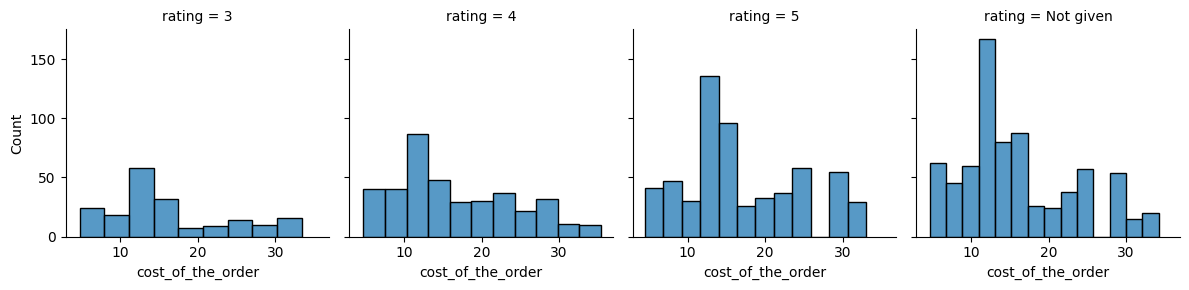

In [ ]:
# Generating distribution plots of Order Costs, across ratings given

plot = sns.FacetGrid(df, col="rating")
plot.map(sns.histplot, "cost_of_the_order");

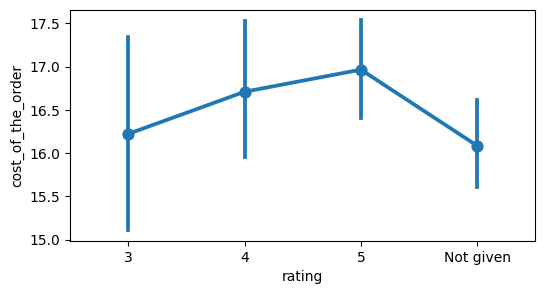

In [ ]:
plt.figure(figsize=(6, 3))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)
plt.show()

- it can be seen that a **majority of orders given a rating of 5 were at the lower end of the cost spectrum**
- **Similar trends were observed for orders with 3 and 4 ratings** which means that **low-cost orders are still being given less than perfect ratings**
- This **may suggest that cost of orders do not exhibit strong influence on customer ratings**

#### **Rating and delivery time**

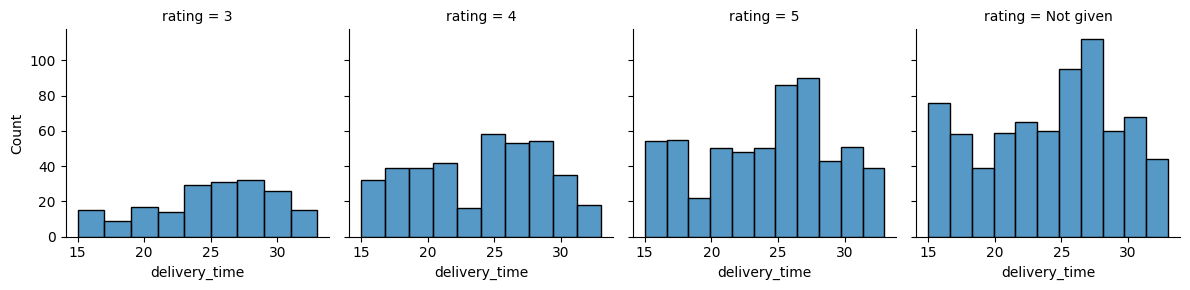

In [ ]:
# Generating distribution plots of Delivery Time, across ratings given

plot = sns.FacetGrid(df, col="rating")
plot.map(sns.histplot, "delivery_time");

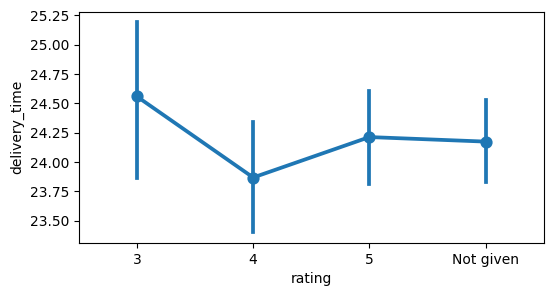

In [ ]:
plt.figure(figsize=(6, 3))
sns.pointplot(data = df, x = 'rating', y = 'delivery_time')
plt.show()

- From the point plot, it can be seen that a **rating of 3 are likely to be given to orders that took longer time** to deliver

#### **Correlation among numerical variables**

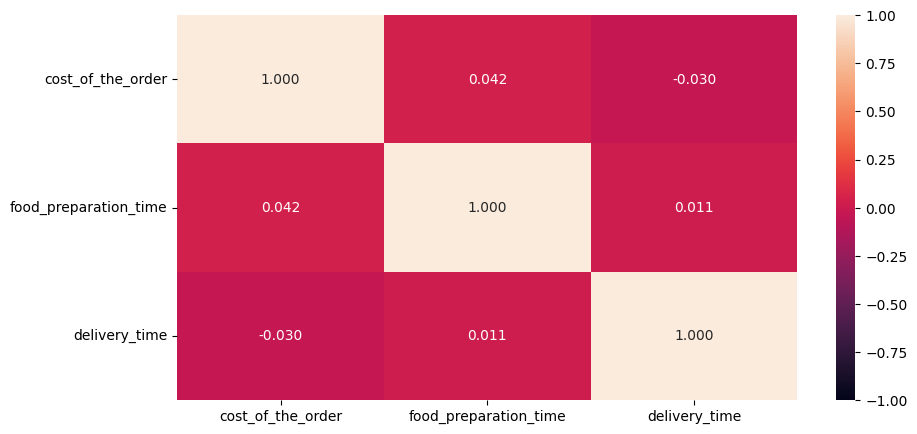

In [ ]:
# Plotting the heatmap showing correlations between numerical columns

num_var = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(10, 5))
sns.heatmap(df[num_var].corr(), annot=True, vmin=-1, vmax=1, fmt=".3f")
plt.show()

- from the heatmap above, the correlation values are very close to 0
- This means that the three numerical variables exhibit weak correlation with one another

## **Summary and Recommendations**:

---
### **Insights from the Analysis**
---

**From Univariate Analysis**
- A considerable number of customers have used the app to make orders more than ones indicating
- While there are a lot of restaurants catering to customer orders, there are 'popular' restaurants that receive significantly larger orders compared to others like:
  1. Shake shack
  2. Meatball shop
  3. Blue ribbon sushi
  4. Blue ribbon Fried chicken
- there are also 14 cuisine types that are being ordered but like the restaurants, some cuisines are far ahead of others in terms of order counts:
  1. American
  2. Japanese
  3. Italian
  4. chinese
- order costs range from 5-35 USD but most occurring orders are priced at 11-12.5 USD which may give insight to the customers' particular spending preference
- More orders are being made during weekends
- Significant portion of the orders are not being rated. Meanwhile those who were, are rated between 3 to 5 with 5-rated orders being the majority. This may indicate good market reception
- Food preparation time ranges from 20-35 mins with the number of orders being equally distributed within this range
- Food delivery time is 15-33 mins while majority of orders are delivered within 25-30 mins

**From Multivariate Analysis**
- Korean, Mediterranean and Vietnamese cuisines are the cheapest yet majority of orders made are from other cuisines (Top 4)
- This means that cuisine preference holds a higher place in customer's decision making process, compared to the price
- Order ratings were found to not be heavily dependent on cuisine nor cost
- On the other hand, orders with longer delivery time have been shown to be more likely rated with a 3

---
### **Recommendations**
---
From the initial analysis of the data, the company can consider the following steps moving forward:
- Ensure faster delivery time to shorten customer waiting period
- Focus on bringing in more restaurants offering the more popular cuisines like american and Japanese. For a particular fixed area of opeartion, customer food preferences are not likely to change abruptly and this can be leveraged to ensure continued success.
- Majority of customers can be said to prefer low cost orders. This information may be leveraged by expanding base of food providers (aka restaurants) to those who sell food within the price range of 11-12.5 USD
- Since almost 2/3 of the total orders are made during weekends, optimum performance should be ensured during these periods
- Encourage customers to submit ratings on their orders for better quality data analysis. This can be done probably by giving out incentives  